In [1]:
%matplotlib inline
import datetime as datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#avisos_detalles = pd.read_csv('/home/luupesado/7506_Datos/2018/datos_navent_fiuba/fiuba_6_avisos_detalle.csv')
#postulaciones = pd.read_csv('/home/luupesado/7506_Datos/2018/datos_navent_fiuba/fiuba_4_postulaciones.csv')
postulantes_educacion = pd.read_csv('/home/luupesado/7506_Datos/2018/datos_navent_fiuba/fiuba_1_postulantes_educacion.csv')

# Vamos a analizar el nivel educativo de los postulantes.

In [3]:
postulantes_educacion['nombre'].value_counts()

Secundario           110256
Universitario        104295
Terciario/Técnico     47733
Otro                  24748
Posgrado               7387
Master                 3598
Doctorado               214
Name: nombre, dtype: int64

In [4]:
postulantes_educacion['nombre-estado'] = postulantes_educacion['nombre'] + ' - ' + postulantes_educacion['estado']

In [14]:
postulantes_educacion = postulantes_educacion.loc[:,['idpostulante', 'nombre-estado']]

In [8]:
postulantes_educacion['idpostulante'].value_counts().head()

YlMLGD     9
54MQGz     8
EZD29      8
Ez0LBk9    7
8M21pBL    7
Name: idpostulante, dtype: int64

Vemos que hay ids repetidos. Para cada id me voy a quedar con el mayor nivel educativo que haya alcanzado.

In [9]:
postulantes_educacion.head()

,idpostulante,nombre,estado,nombre-estado
0,NdJl,Posgrado,En Curso,Posgrado - En Curso
1,8BkL,Universitario,En Curso,Universitario - En Curso
2,1d2B,Universitario,En Curso,Universitario - En Curso
3,NPBx,Universitario,En Curso,Universitario - En Curso
4,NPBx,Master,En Curso,Master - En Curso


In [14]:
postulantes_educacion['nombre-estado'] = postulantes_educacion['nombre-estado'].astype('category')

In [15]:
postulantes_educacion['nombre-estado'] = postulantes_educacion['nombre-estado'].cat.set_categories(['Otro - Abandonado',
 'Otro - En Curso',                                        
 'Otro - Graduado', 
'Secundario - Abandonado',
 'Secundario - En Curso',
 'Secundario - Graduado',
 'Terciario/T\xc3\xa9cnico - Abandonado',
 'Terciario/T\xc3\xa9cnico - En Curso',
 'Terciario/T\xc3\xa9cnico - Graduado',
 'Universitario - Abandonado',
 'Universitario - En Curso',
 'Universitario - Graduado',
'Posgrado - Abandonado',
 'Posgrado - En Curso',
 'Posgrado - Graduado',
 'Master - Abandonado',
 'Master - En Curso',
 'Master - Graduado',
'Doctorado - Abandonado',
 'Doctorado - En Curso',
 'Doctorado - Graduado'], ordered=True)

In [16]:
postulantes_educacion = postulantes_educacion.sort_values('nombre-estado', ascending= False).drop_duplicates(subset='idpostulante', keep = 'first')

Comprobamos que ya no tenemos duplicados

In [19]:
postulantes_educacion['idpostulante'].value_counts().head()

Rz6VOrE    1
bOJLX14    1
96XOwba    1
1QrA4ez    1
5avONz     1
Name: idpostulante, dtype: int64

In [20]:
postulantes_educacion['nombre-estado'].value_counts().sort_index()

Otro - Abandonado                   219
Otro - En Curso                     186
Otro - Graduado                     933
Secundario - Abandonado            2681
Secundario - En Curso              3397
Secundario - Graduado             56333
Terciario/Técnico - Abandonado     3034
Terciario/Técnico - En Curso       9730
Terciario/Técnico - Graduado      14665
Universitario - Abandonado         9895
Universitario - En Curso          46685
Universitario - Graduado          31258
Posgrado - Abandonado               248
Posgrado - En Curso                1730
Posgrado - Graduado                4072
Master - Abandonado                 131
Master - En Curso                  1449
Master - Graduado                  1895
Doctorado - Abandonado               15
Doctorado - En Curso                 91
Doctorado - Graduado                105
Name: nombre-estado, dtype: int64

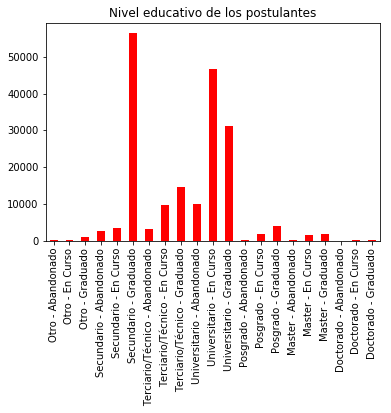

In [21]:
grafico_nivel_educativo = postulantes_educacion['nombre-estado'].value_counts().sort_index().plot('bar', title = 'Nivel educativo de los postulantes', color = ['red', 'yellow', 'green'])

In [70]:
postulantes_nombre = postulantes_educacion.groupby(['estado', 'nombre'])['idpostulante'].count()
postulantes_nombre

estado      nombre           
Abandonado  Doctorado               15
            Master                 131
            Otro                   219
            Posgrado               248
            Secundario            2681
            Terciario/Técnico     3034
            Universitario         9895
En Curso    Doctorado               91
            Master                1449
            Otro                   186
            Posgrado              1730
            Secundario            3397
            Terciario/Técnico     9730
            Universitario        46685
Graduado    Doctorado              105
            Master                1895
            Otro                   933
            Posgrado              4072
            Secundario           56333
            Terciario/Técnico    14665
            Universitario        31258
Name: idpostulante, dtype: int64

In [76]:
import unicodedata
def elimina_tildes(s):
   return ''.join((c for c in unicodedata.normalize('NFD', s) if unicodedata.category(c) != 'Mn'))
def devolver_lista_sin_tiles(keys):
    klist = []
    for k in keys:
        klist.append(elimina_tildes(k.decode('utf-8')))
    return klist

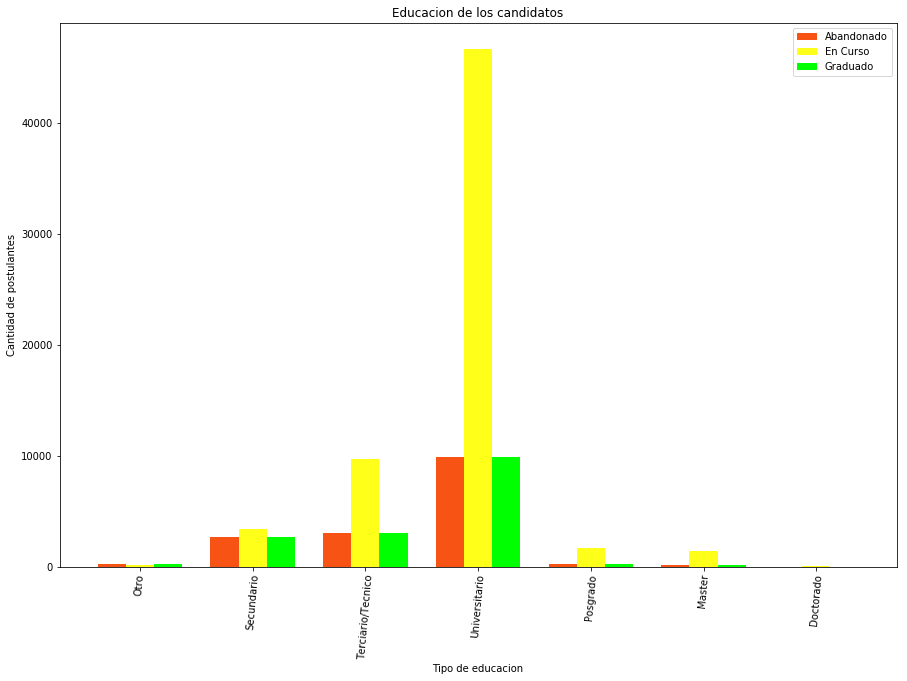

In [117]:
fig, ax = plt.subplots(figsize = (15,10))
width = 0.25
#for estado in 
#nombres = dict.fromkeys(postulantes_educacion['nombre'].get_values()).keys()
#estados = devolver_lista_sin_tiles(dict.fromkeys(postulantes_educacion['estado'].get_values()).keys())
postulantes_abandonado = []
postulantes_encurso = []
postulantes_graduado = []
nombres = ['Otro', 'Secundario','Terciario/Técnico','Universitario','Posgrado','Master','Doctorado']
for nombre in nombres:
    
    postulantes_abandonado.append(postulantes_nombre['Abandonado'][nombre])
    #encurso
    postulantes_encurso.append(postulantes_nombre['En Curso'][nombre])
    #graduado
    postulantes_graduado.append(postulantes_nombre['Graduado'][nombre])

abandonado = ax.bar(np.arange(len(nombres))-width, postulantes_abandonado, width, color = '#f65314')
encurso = ax.bar(np.arange(len(nombres)), postulantes_encurso, width, color = '#ffff1a')
graduado = ax.bar(np.arange(len(nombres))+width, postulantes_abandonado, width, color = '#00ff00')

nombres = ['Otro', 'Secundario','Terciario/Tecnico','Universitario','Posgrado','Master','Doctorado']
#nombres = devolver_lista_sin_tiles(dict.fromkeys(postulantes_educacion['nombre'].get_values()).keys())

ax.set_xticks(np.arange(len(nombres)))
ax.set_xticklabels(nombres,rotation=85)

ax.legend((abandonado[0], encurso[0], graduado[0]), ('Abandonado', 'En Curso', 'Graduado'))
ax.set_ylabel('Cantidad de postulantes')
ax.set_xlabel('Tipo de educacion')
ax.set_title('Educacion de los candidatos')

Hago un gráfico ahora por tipo de educación para que se pueda apreciar mejor

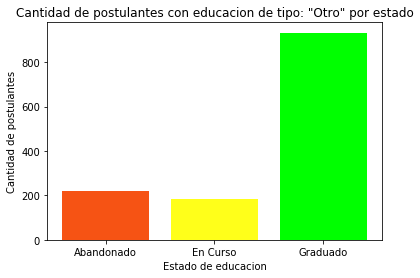

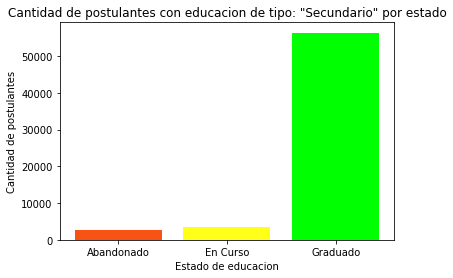

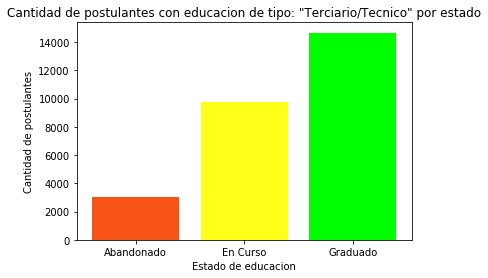

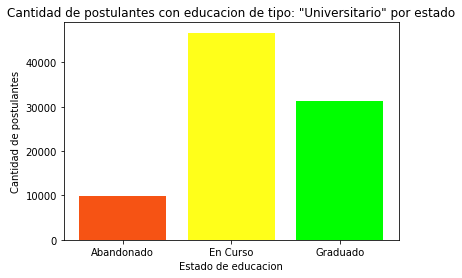

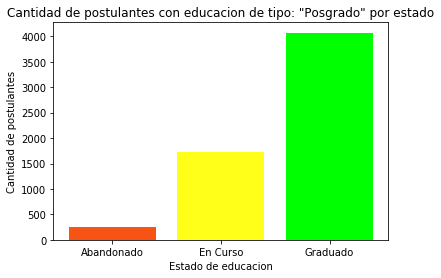

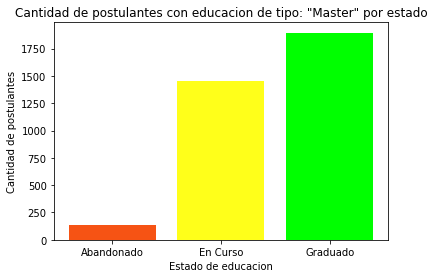

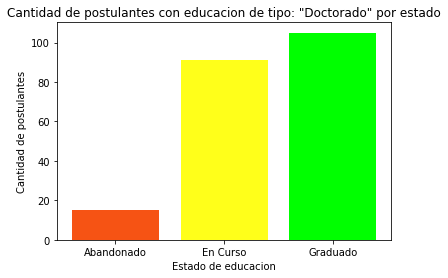

In [125]:
estados = ['Abandonado', 'En Curso', 'Graduado']
nombres = ['Otro', 'Secundario','Terciario/Técnico','Universitario','Posgrado','Master','Doctorado']

width = 0.35
for nombre in nombres:
    postulantes_estado = []
    fig, ax = plt.subplots()
    for estado in estados:
        postulantes_estado.append(postulantes_nombre[estado][nombre])
    ax.bar(np.arange(3), postulantes_estado, color = ['#f65314', '#ffff1a','#00ff00'])
    ax.set_ylabel('Cantidad de postulantes')
    ax.set_xlabel('Estado de educacion')
    nombre = elimina_tildes(nombre.decode('utf-8'))
    ax.set_xticks(np.arange(3))
    ax.set_xticklabels(estados,rotation=0)
    #ax.legend((abandonado[0], encurso[0], graduado[0]), ('Abandonado', 'En Curso', 'Graduado'))
    ax.set_title('Cantidad de postulantes con educacion de tipo: "' + nombre + '" por estado')
    
    

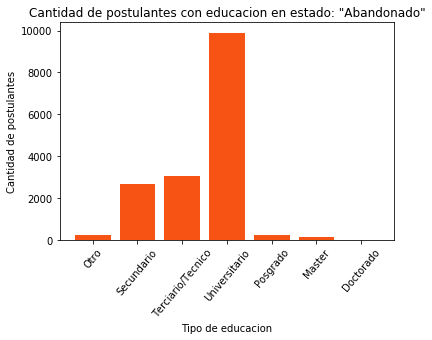

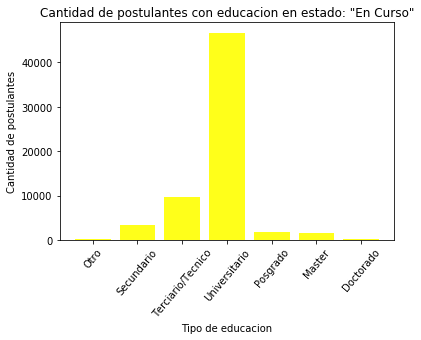

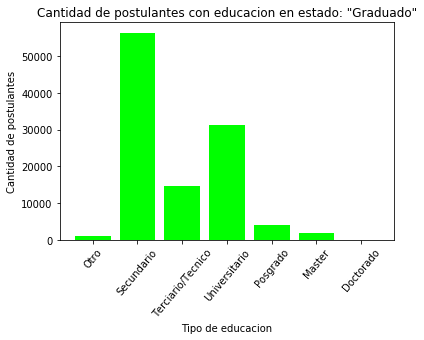

In [132]:
estados = ['Abandonado', 'En Curso', 'Graduado']
nombres = ['Otro', 'Secundario','Terciario/Técnico','Universitario','Posgrado','Master','Doctorado']
def get_color(unEstado):
    if estado == 'Abandonado': return '#f65314'
    if estado == 'En Curso': return '#ffff1a'
    if estado == 'Graduado': return '#00ff00'

width = 0.35
for estado in estados:
    nombres = ['Otro', 'Secundario','Terciario/Técnico','Universitario','Posgrado','Master','Doctorado']
    postulantes_estado = []
    fig, ax = plt.subplots()
    for nombre in nombres:
        postulantes_estado.append(postulantes_nombre[estado][nombre])
    nombres = ['Otro', 'Secundario','Terciario/Tecnico','Universitario','Posgrado','Master','Doctorado']
    ax.bar(np.arange(len(nombres)), postulantes_estado, color = get_color(estado))
    ax.set_xticks(np.arange(len(nombres)))
    ax.set_xticklabels(nombres,rotation=50)
    ax.set_ylabel('Cantidad de postulantes')
    ax.set_xlabel('Tipo de educacion')
    #ax.legend((abandonado[0], encurso[0], graduado[0]), ('Abandonado', 'En Curso', 'Graduado'))
    ax.set_title('Cantidad de postulantes con educacion en estado: "' + estado + '"')
    